### Neural Networks and Computational Intelligence
**Assigment 1** \
Hugo Kolstee - s3515249 \
Yorick Juffer - s1993623

#### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Dataset
Generates a dataset where the vectors have a mean of 0 and a standard deviation of 1. Also generates the random labels of -1 and 1.

In [2]:
class Dataset:
    def __init__(self, p, n):
        self.p = p   # number of vectors
        self.n = n   # size of vectors
        self.left = int(self.p/2)
        self.right = self.p - self.left
        self.data = self.generate_data()
        self.labels = self.generate_labels()

    def generate_data(self):
        data_x = np.random.normal(0.01, 1, size=(self.left, self.n))
        data_y = np.random.normal(-0.01, 1, size=(self.right, self.n))
        data = np.concatenate((data_x, data_y))
        return data

    def generate_labels(self):
        labels_x = np.ones(self.left)
        labels_y = np.ones(self.right) * -1
        labels = np.concatenate((labels_x, labels_y))
        return labels

#### Training

In [3]:
def train(data):
    weights = np.zeros(data.n, dtype = float)
    iterations = 100
    for i in range(iterations):
        misclassifications = 0

        for j in range(0, data.p):
            
            if(np.dot(weights, data.data[j]) * data.labels[j] <= 0):
                weights += (1/data.n) * data.data[j] * data.labels[j]
                misclassifications += 1

        if(misclassifications == 0):
            break

    return (data.p - misclassifications)/data.p * 100

#### Perceptron

In [4]:
def perceptron(n):
    p_array = [int(i * n) for i in np.arange(0.75, 4.25, 0.01)]
    datasets = 50
    results = np.zeros(len(p_array))

    for dataset in range(datasets):

        count = 0

        for p in p_array:
            
            # generate
            data = Dataset(p, n)

            # train
            accuracy = train(data)

            accuracy = (results[count] + accuracy) 
            results[count] = accuracy

            count += 1

            print("N: {}, Dataset: {}, P: {}".format(n, dataset, p), end="\r")

    results = pd.DataFrame(results/datasets)
    results = (results - results.min())/ (results.max() - results.min())
    results = results.assign(alpha=[i for i in np.arange(0.75, 4.25, 0.01)])
    return results

#### Gather Data

In [5]:
data_5 = perceptron(5)
data_20 = perceptron(20)
data_100 = perceptron(100)
data_200 = perceptron(200)

#### Generate Plots

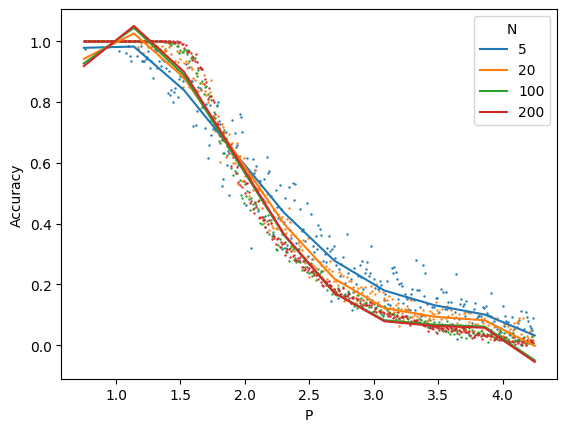

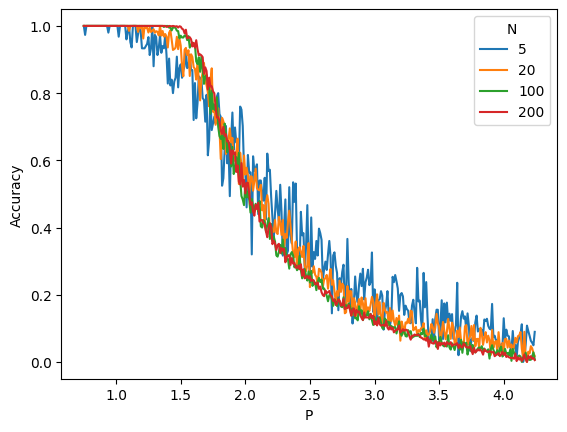

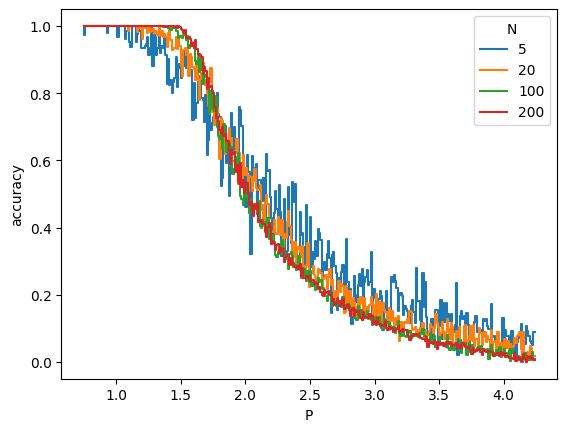

In [7]:
x = data_5["alpha"]
y = data_5[0]
mymodel = np.poly1d(np.polyfit(x, y, 4))
myline = np.linspace(0.75, 4.25, 10)
plt.scatter(x, y, s=0.5)
plt.plot(myline, mymodel(myline), label = "5")


x = data_20["alpha"]
y = data_20[0]
mymodel = np.poly1d(np.polyfit(x, y, 4))
myline = np.linspace(0.75, 4.25, 10)
plt.scatter(x, y, s=0.5)
plt.plot(myline, mymodel(myline), label = "20")


x = data_100["alpha"]
y = data_100[0]
mymodel = np.poly1d(np.polyfit(x, y, 4))
myline = np.linspace(0.75, 4.25, 10)
plt.scatter(x, y, s=0.5)
plt.plot(myline, mymodel(myline), label = "100")

x = data_200["alpha"]
y = data_200[0]
mymodel = np.poly1d(np.polyfit(x, y, 4))
myline = np.linspace(0.75, 4.25, 10)
plt.scatter(x, y, s=0.5)
plt.plot(myline, mymodel(myline), label = "200")
plt.legend(loc="upper right", title="N")
plt.xlabel('P')
plt.ylabel('Accuracy')
plt.show()

# Simple Plots
plt.plot(data_5["alpha"], data_5[0], label = "5")
plt.plot(data_20["alpha"], data_20[0], label = "20")
plt.plot(data_100["alpha"], data_100[0], label = "100")
plt.plot(data_200["alpha"], data_200[0], label = "200")
plt.legend(loc="upper right", title="N")
plt.xlabel('P')
plt.ylabel('Accuracy')
plt.show()

# Step Plots
fig, ax = plt.subplots()
ax.step(data_5["alpha"], data_5[0], label = "5")
ax.step(data_20["alpha"], data_20[0], label = "20")
ax.step(data_100["alpha"], data_100[0], label = "100")
ax.step(data_200["alpha"], data_200[0], label = "200")
plt.legend(loc="upper right", title="N")
plt.xlabel('P')
plt.ylabel('accuracy')
plt.show()

